# Modified TF-IDF with Machine Learning Classifier for Hate Speech Detection on Twitter

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import warnings 
warnings.filterwarnings('ignore')

In [202]:
df = pd.read_csv("clean_tweets.csv")

In [203]:
#df.head()
df

,label,clean_tweet_final
0,0,when a father is dysfunctional and is so selfi...
1,0,thanks for credit i can't use cause they don't...
2,0,bihday your majesty
3,0,i love u take with u all the time in urd+-!!! ...
4,0,factsguide: society now
...,...,...
31957,0,"ate isz that youuu?ddddddddda$?i,"
31958,0,to see nina turner on the airwaves trying to w...
31959,0,listening to sad songs on a monday morning otw...
31960,1,vandalised in in condemns act


In [204]:
df.shape

(31962, 2)

In [205]:
dff = df.drop(['label'], axis = 1)

In [206]:
#dff.head()
dff

,clean_tweet_final
0,when a father is dysfunctional and is so selfi...
1,thanks for credit i can't use cause they don't...
2,bihday your majesty
3,i love u take with u all the time in urd+-!!! ...
4,factsguide: society now
...,...
31957,"ate isz that youuu?ddddddddda$?i,"
31958,to see nina turner on the airwaves trying to w...
31959,listening to sad songs on a monday morning otw...
31960,vandalised in in condemns act


In [207]:
X_temp, X_test, y_temp, y_test = train_test_split(dff, list(df.label), test_size=0.1)

In [208]:
X_test.shape

(3197, 1)

In [209]:
X_temp.shape

(28765, 1)

In [210]:
len(y_test)

3197

In [211]:
type(y_temp)

list

In [212]:
X_temp['label'] = y_temp

In [213]:
#X_temp.head()
X_temp

,clean_tweet_final,label
21795,#NAME?,0
29235,attack bull game 3d: do you really think that ...,0
13011,there is no blissful peace until one passes be...,0
23469,happy bday to me! love my shoes! the best bday...,0
20897,bloody love my manager look at him the handsom...,0
...,...,...
31388,"hea a$?i, goes out to all affected",0
6099,why don't you ever bring this up? you'll beat ...,0
11333,50% off all chamilia charms - entire inventory...,0
19177,only smiles dddadaddd day,0


In [214]:
X_temp.label[2] 

0

In [215]:
type(X_temp)

pandas.core.frame.DataFrame

In [216]:
nonhate = X_temp[X_temp['label'] == 0]

In [217]:
#nonhate.head()
nonhate

,clean_tweet_final,label
21795,#NAME?,0
29235,attack bull game 3d: do you really think that ...,0
13011,there is no blissful peace until one passes be...,0
23469,happy bday to me! love my shoes! the best bday...,0
20897,bloody love my manager look at him the handsom...,0
...,...,...
31388,"hea a$?i, goes out to all affected",0
6099,why don't you ever bring this up? you'll beat ...,0
11333,50% off all chamilia charms - entire inventory...,0
19177,only smiles dddadaddd day,0


In [262]:
hate = X_temp[X_temp.label == 1]
hate

,clean_tweet_final,label
17016,this should have been enough 2 just say no a|,1
2796,"""the education of public servants is a critica...",1
3356,check out this post! confession: i'm,1
14506,"lisa likes cuckold write now! ai, aa",1
826,.@user is it possible for you to speak in any ...,1
...,...,...
31765,what has todayAs attitude to women got in comm...,1
29087,after being a of a (i was called a cr*cker) i ...,1
16446,has happened far too often,1
12845,it's 2016! would you question like that consid...,1


In [219]:
hate.shape[1]

2

In [220]:
nonhatesample = nonhate.sample(n = hate.shape[0])

In [221]:
nonhatesample.head()

,clean_tweet_final,label
5849,"a$?i,come here velly a$?i,",0
28826,comes out in 14 minutes and im taking my scien...,0
14540,"""postitnotechronicles"", that's what they want ...",0
18685,excellent news with work.,0
8978,be n i don't believe in accidents. there are o...,0


In [222]:
nonhatesample.shape

(2014, 2)

In [223]:
ds = pd.concat([hate, nonhatesample], axis = 0)

In [224]:
ds.tail()

,clean_tweet_final,label
1600,love these. my favourite item of clothing.,0
4683,poland should have down germany tonight but wa...,0
20528,this man has been with us since primary school...,0
7963,"check 48thweeksary ""#jesus said,father forgive...",0
22131,get get get,0


In [225]:
ds.shape

(4028, 2)

In [226]:
ds.to_csv("trainset.csv")

In [227]:
ds = pd.read_csv("trainset.csv")

In [228]:
ds.head()

,Unnamed: 0,clean_tweet_final,label
0,17016,this should have been enough 2 just say no a|,1
1,2796,"""the education of public servants is a critica...",1
2,3356,check out this post! confession: i'm,1
3,14506,"lisa likes cuckold write now! ai, aa",1
4,826,.@user is it possible for you to speak in any ...,1


In [229]:
ds_temp = ds

In [230]:
testdf = X_test
testdf['label'] = y_test

In [231]:
testdf.shape

(3197, 2)

In [232]:
ds = pd.concat([ds_temp, testdf], axis = 0)

In [233]:
ds.head()

,Unnamed: 0,clean_tweet_final,label
0,17016.0,this should have been enough 2 just say no a|,1
1,2796.0,"""the education of public servants is a critica...",1
2,3356.0,check out this post! confession: i'm,1
3,14506.0,"lisa likes cuckold write now! ai, aa",1
4,826.0,.@user is it possible for you to speak in any ...,1


In [234]:
ds.drop("Unnamed: 0",axis=1)

,clean_tweet_final,label
0,this should have been enough 2 just say no a|,1
1,"""the education of public servants is a critica...",1
2,check out this post! confession: i'm,1
3,"lisa likes cuckold write now! ai, aa",1
4,.@user is it possible for you to speak in any ...,1
...,...,...
6594,"off to bracebridge, huntsville to look at more...",0
15721,out of state. the gray is not healthy for my m...,0
14907,i love u take with u all the time in urd+-!!! ...,0
3111,gorilla simulator: you need to do to adapt to ...,0


In [235]:
ds.shape

(7225, 3)

In [236]:
#testdf.head()
testdf

,clean_tweet_final,label
13278,great aicle of truth about needs. comments bac...,1
30482,couple having sex bisexual webcam movies,0
6878,click to watch a!,0
8829,"the wellness industry (healing, fitness) is no...",0
21213,woohoo is coming very soon only on dd tayyaar ...,0
...,...,...
6594,"off to bracebridge, huntsville to look at more...",0
15721,out of state. the gray is not healthy for my m...,0
14907,i love u take with u all the time in urd+-!!! ...,0
3111,gorilla simulator: you need to do to adapt to ...,0


In [237]:
ds = ds.drop("Unnamed: 0",axis=1)

In [238]:
ds.head()

,clean_tweet_final,label
0,this should have been enough 2 just say no a|,1
1,"""the education of public servants is a critica...",1
2,check out this post! confession: i'm,1
3,"lisa likes cuckold write now! ai, aa",1
4,.@user is it possible for you to speak in any ...,1


In [239]:
list(testdf.index)

[13278,
 30482,
 6878,
 8829,
 21213,
 6772,
 10404,
 4529,
 24914,
 27266,
 15350,
 26981,
 554,
 4543,
 11504,
 10814,
 23320,
 21653,
 20977,
 4249,
 3846,
 23811,
 23977,
 24595,
 26070,
 29980,
 16409,
 25008,
 20742,
 23873,
 21936,
 26124,
 17213,
 21574,
 1827,
 9538,
 1226,
 29560,
 17140,
 6146,
 3196,
 9926,
 5800,
 3719,
 9653,
 18355,
 22664,
 21580,
 17529,
 12922,
 20875,
 6320,
 13558,
 17412,
 15746,
 31743,
 11980,
 4145,
 4269,
 2141,
 7214,
 7548,
 4552,
 25726,
 572,
 14849,
 15930,
 22225,
 560,
 8818,
 21065,
 3507,
 20672,
 15888,
 15452,
 8578,
 23432,
 26640,
 6873,
 26890,
 19744,
 27878,
 31249,
 4512,
 16227,
 13197,
 8125,
 4810,
 31351,
 23376,
 4516,
 22603,
 13437,
 31681,
 2622,
 31555,
 7871,
 6399,
 4767,
 13866,
 27764,
 17943,
 29725,
 12609,
 11055,
 2500,
 3860,
 24513,
 21428,
 18968,
 12801,
 440,
 30146,
 9334,
 2690,
 3653,
 22757,
 31668,
 15164,
 29754,
 29460,
 12453,
 17677,
 27556,
 12635,
 30324,
 6490,
 12189,
 10747,
 8862,
 17787,
 2

In [240]:
corpus = []
for i in range(ds.shape[0]):
    corpus.append(ds.iloc[i][0])

In [241]:
corpus

['this should have been enough 2 just say no a|',
 '"the education of public servants is a critical pa of the path forward..." so true.',
 "check out this post! confession: i'm",
 'lisa likes cuckold write now! ai, aa',
 '.@user is it possible for you to speak in any topic without bringing race into it, you bigot? a|',
 'amateur spanking vids against women in the workplace',
 'in the case of the commonwealth of the internet vs the evidence proved him guilty of , , and',
 '! tears',
 'omg, these trump suppoers are deplorable!',
 'the revolution occurredajust not how marx expected it to. a|',
 'sad how people feel they have to treat others like scum just because of their religion, race, sexuality, ect.',
 'is ? please stop this "offended culture" madness!',
 'go take your anti meds',
 "when you don't want to read dd 1/2",
 'the white flight of derek black',
 'you might be a libtard if...',
 'why is ignored',
 'trumps wall is not about . the coal fired electrical producers need to dispose

In [242]:
cleaned_corpus = [x for x in corpus if str(x) != 'nan']

In [243]:
print(cleaned_corpus)

['this should have been enough 2 just say no a|', '"the education of public servants is a critical pa of the path forward..." so true.', "check out this post! confession: i'm", 'lisa likes cuckold write now! ai, aa', '.@user is it possible for you to speak in any topic without bringing race into it, you bigot? a|', 'amateur spanking vids against women in the workplace', 'in the case of the commonwealth of the internet vs the evidence proved him guilty of , , and', '! tears', 'omg, these trump suppoers are deplorable!', 'the revolution occurredajust not how marx expected it to. a|', 'sad how people feel they have to treat others like scum just because of their religion, race, sexuality, ect.', 'is ? please stop this "offended culture" madness!', 'go take your anti meds', "when you don't want to read dd 1/2", 'the white flight of derek black', 'you might be a libtard if...', 'why is ignored', 'trumps wall is not about . the coal fired electrical producers need to dispose of fly ash stock

In [244]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cleaned_corpus)
feature_names = vectorizer.get_feature_names()
dense = X.todense()
denselist = dense.tolist()
df2 = pd.DataFrame(denselist, columns=feature_names)
df2

,00,000,01,05,06,0613,08,0dy,10,100,...,zimmer,zionism,zit,zoe,zombies,zone,zoomerplex,zouma,zuma,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [245]:
df2[0:7204]

,00,000,01,05,06,0613,08,0dy,10,100,...,zimmer,zionism,zit,zoe,zombies,zone,zoomerplex,zouma,zuma,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [246]:
tdf = df2
tdf['labelxyz'] = list(ds[0:len(tdf)].label)

In [247]:
tdf.tail()

,00,000,01,05,06,0613,08,0dy,10,100,...,zionism,zit,zoe,zombies,zone,zoomerplex,zouma,zuma,zurich,labelxyz
7204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [248]:
print(tdf[tdf.labelxyz == 1])

       00  000   01   05   06  0613   08  0dy   10  100  ...  zionism  zit  \
0     0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...      0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...      0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...      0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...      0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...      0.0  0.0   
...   ...  ...  ...  ...  ...   ...  ...  ...  ...  ...  ...      ...  ...   
7137  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...      0.0  0.0   
7154  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...      0.0  0.0   
7155  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...      0.0  0.0   
7166  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...      0.0  0.0   
7194  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...      0.0  0.0   

      zoe  zombies  zone  zoomerplex  zouma  zuma  zurich  labe

In [249]:
tdf_hate = tdf[tdf.labelxyz == 1]
tdf_hate_new = tdf_hate
tdf_hate_new=tdf_hate_new.drop("labelxyz",axis=1)
print(tdf_hate_new)

       00  000   01   05   06  0613   08  0dy   10  100  ...  zimmer  zionism  \
0     0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0      0.0   
1     0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0      0.0   
2     0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0      0.0   
3     0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0      0.0   
4     0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0      0.0   
...   ...  ...  ...  ...  ...   ...  ...  ...  ...  ...  ...     ...      ...   
7137  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0      0.0   
7154  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0      0.0   
7155  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0      0.0   
7166  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0      0.0   
7194  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0      0.0   

      zit  zoe  zombies  zo

In [250]:
tdf_hate.shape

(2241, 10254)

In [251]:
tdf_nonhate = tdf[tdf.labelxyz == 0]

In [252]:
tdf_nonhate_new = tdf_nonhate
tdf_nonhate_new=tdf_nonhate_new.drop("labelxyz",axis=1)
print(tdf_nonhate_new)

       00  000   01   05   06  0613   08  0dy   10  100  ...  zimmer  zionism  \
2014  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0      0.0   
2015  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0      0.0   
2016  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0      0.0   
2017  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0      0.0   
2018  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0      0.0   
...   ...  ...  ...  ...  ...   ...  ...  ...  ...  ...  ...     ...      ...   
7204  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0      0.0   
7205  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0      0.0   
7206  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0      0.0   
7207  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0      0.0   
7208  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...     0.0      0.0   

      zit  zoe  zombies  zo

In [253]:
tdf_nonhate.shape

(4968, 10254)

In [254]:
X_train_hate = tdf_hate.sample(frac=0.9, random_state=0)

X_test_hate = tdf_hate.drop(X_train_hate.index)

X_train_nonhate =  tdf_nonhate.sample(frac=0.406, random_state=0)

X_test_nonhate = tdf_nonhate.drop(X_train_nonhate.index)

In [255]:
X_train_df = pd.concat([X_train_hate, X_train_nonhate], axis = 0)
X_train_df

,00,000,01,05,06,0613,08,0dy,10,100,...,zionism,zit,zoe,zombies,zone,zoomerplex,zouma,zuma,zurich,labelxyz
107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [256]:
X_train = X_train_df.drop(['labelxyz'], axis = 1)

y_train = list(X_train_df.labelxyz)

X_test_df = pd.concat([X_test_hate, X_test_nonhate], axis = 0)

X_test = X_test_df.drop(['labelxyz'], axis = 1)

y_test = list(X_test_df.labelxyz)

In [257]:
rand_clf = RandomForestClassifier(n_estimators=300,criterion='entropy',max_depth=10,min_samples_split=5,min_samples_leaf=1,random_state=0)
rand_clf.fit(X_train, y_train)
predict = rand_clf.predict(X_test)
acc_rf = accuracy_score(y_test, predict)
print('Accuracy of RF Classifier is ', acc_rf)

Accuracy of RF Classifier is  0.8251968503937008


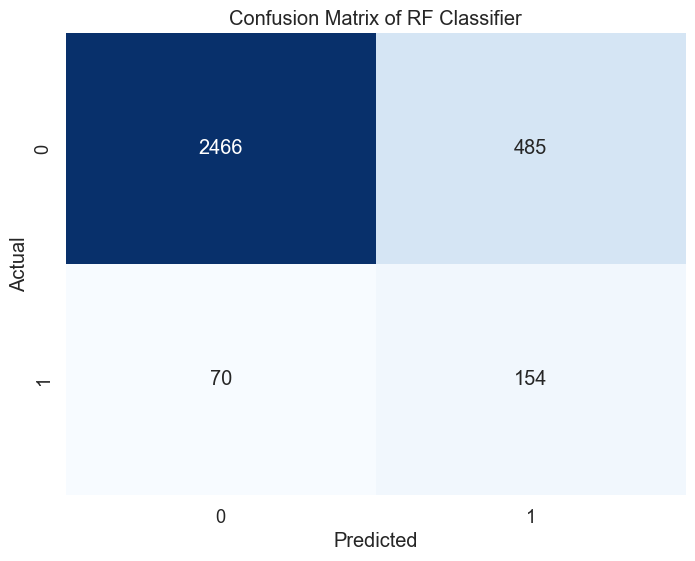

In [258]:
cm = confusion_matrix(y_test, predict)
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of RF Classifier')
plt.show()

In [259]:
#Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predict_log = log_reg.predict(X_test)
acc_log = accuracy_score(y_test, predict_log)
print('Accuracy of LR mdoel is ', acc_log)

Accuracy of LR mdoel is  0.7691338582677165


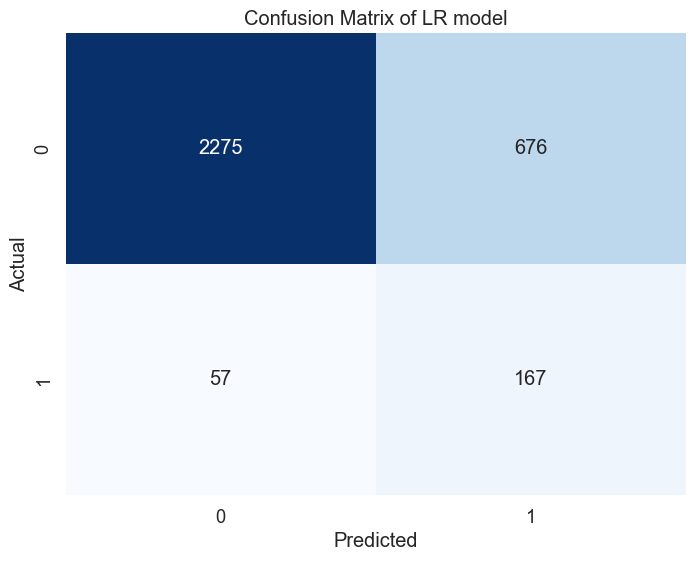

In [260]:
#from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, predict_log)
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of LR model')
plt.show()


In [261]:
#Prediction
A= 'HATE SPEECH'
B= 'GENUINE SPEECH'
predict = rand_clf.predict(X_test.iloc[1:5,:])
for i in range(len(predict)):
    if predict[i] == 0:
        print("{} :{} ".format(X_test.iloc[i,:],A))
    else:
        print("{} :{} ".format(X_test.iloc[i,:],B))

00            0.0
000           0.0
01            0.0
05            0.0
06            0.0
             ... 
zone          0.0
zoomerplex    0.0
zouma         0.0
zuma          0.0
zurich        0.0
Name: 24, Length: 10253, dtype: float64 :GENUINE SPEECH 
00            0.0
000           0.0
01            0.0
05            0.0
06            0.0
             ... 
zone          0.0
zoomerplex    0.0
zouma         0.0
zuma          0.0
zurich        0.0
Name: 25, Length: 10253, dtype: float64 :GENUINE SPEECH 
00            0.0
000           0.0
01            0.0
05            0.0
06            0.0
             ... 
zone          0.0
zoomerplex    0.0
zouma         0.0
zuma          0.0
zurich        0.0
Name: 67, Length: 10253, dtype: float64 :GENUINE SPEECH 
00            0.0
000           0.0
01            0.0
05            0.0
06            0.0
             ... 
zone          0.0
zoomerplex    0.0
zouma         0.0
zuma          0.0
zurich        0.0
Name: 69, Length: 10253, dtype: float